<h1 style="color:red;font-size:35px;text-align:center;">311 Departement capstone project</h1>

# Question number 1

# Top complaint type

# setting up our environment and importing useful libraries

In [1]:
# The code was removed by Watson Studio for sharing.

# Getting Infos about the dataframe

In [2]:
df = pd.read_pickle('./df_raw_local.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022883 entries, 0 to 6022882
Data columns (total 15 columns):
created_date              object
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: float64(3), int64(1), object(11)
memory usage: 689.3+ MB


# Showing first 5 lines of the dataframe

In [3]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-05T10:29:10.000,45554675,DOOR/WINDOW,10016.0,500 2 AVENUE,2 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.741111,-73.978539,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-05T12:51:21.000,45553708,ELECTRIC,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-05T20:44:10.000,45554755,HEAT/HOT WATER,11216.0,815 PARK PLACE,PARK PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.673471,-73.950921,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-05T07:47:17.000,45553828,HEAT/HOT WATER,10003.0,332 EAST 9 STREET,EAST 9 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728796,-73.986351,2020-02-05T17:25:20.000,RESIDENTIAL BUILDING,Closed
4,2020-02-05T18:48:25.000,45553886,HEAT/HOT WATER,10034.0,125 VERMILYEA AVENUE,VERMILYEA AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.866492,-73.921313,NaN,RESIDENTIAL BUILDING,Open


# Let's have an idea about the complaints

In [4]:
print(df['complaint_type'].describe()) #helps to have a clear idea about the top complaint type

count            6022883
unique                30
top       HEAT/HOT WATER
freq             1263069
Name: complaint_type, dtype: object


# It's Clear that the Top complaint_type is HEAT/HOT WATER .

# Now we'll count all types to see if some other complaint has a high number also

# value_counts method allows us to see the total of each complaint_type 

In [5]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            1263069
HEATING                    887869
PLUMBING                   711360
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       452031
PAINT - PLASTER            361257
PAINT/PLASTER              346596
ELECTRIC                   307430
NONCONST                   260890
DOOR/WINDOW                205424
WATER LEAK                 193758
GENERAL                    151429
FLOORING/STAIRS            137462
APPLIANCE                  112932
HPD Literature Request      52830
SAFETY                      51582
OUTSIDE BUILDING             7147
ELEVATOR                     6734
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

# New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one.

In [6]:
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])
df['complaint_type'].value_counts()

HEAT/HOT WATER            2150938
PLUMBING                   711360
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       452031
PAINT - PLASTER            361257
PAINT/PLASTER              346596
ELECTRIC                   307430
NONCONST                   260890
DOOR/WINDOW                205424
WATER LEAK                 193758
GENERAL                    151429
FLOORING/STAIRS            137462
APPLIANCE                  112932
HPD Literature Request      52830
SAFETY                      51582
OUTSIDE BUILDING             7147
ELEVATOR                     6734
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold                            1
Name: complain

# This Barchart shows us clearly that 311 departement should focus on HEAT/HOT WATER and HEATING as top complaint types

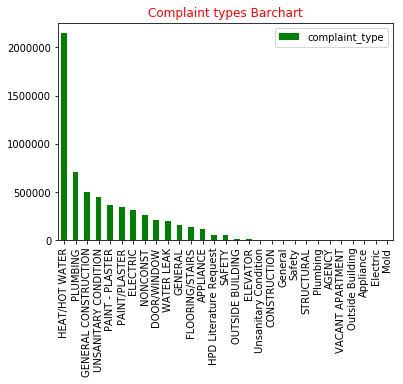

In [7]:
df_complaint=pd.DataFrame(df['complaint_type'].value_counts()) #creates a new data frame that shows the total of each complaint type
df_complaint.plot(kind='bar', color='green') #vizualize a barchart of the complaint type and their top one
df_complaint.columns=['total']
plt.title('Complaint types Barchart', color='red')
plt.show()

# Let's make a pie chart visualization of the top 10 complaints types

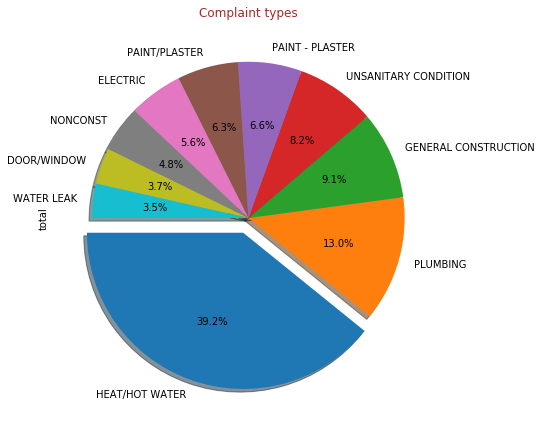

In [8]:
top10=df_complaint.head(10)
explode=(0.1,0,0,0,0,0,0,0,0,0)
top10['total'].plot(kind='pie', explode=explode, figsize=(7,8), shadow=True,autopct='%1.1f%%',startangle=180)
plt.title('Complaint types', color='brown')
plt.show()